In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler


In [32]:
dataset = pd.read_csv('Data_file.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S.No.                 1338 non-null   int64 
 1   College               1338 non-null   object
 2   Role                  1338 non-null   object
 3   City type             1338 non-null   object
 4   Previous CTC          1338 non-null   object
 5   Previous job changes  1338 non-null   int64 
 6   Graduation marks      1338 non-null   int64 
 7   Exp (Months)          1338 non-null   int64 
 8   CTC                   1338 non-null   object
dtypes: int64(4), object(5)
memory usage: 94.2+ KB


In [33]:


dataset['CTC']= dataset['CTC'].astype(str) 
dataset['CTC']=dataset.CTC.str.replace(',','').astype(float)

dataset['Previous CTC']= dataset['Previous CTC'].astype(str)




dataset.rename(columns = {'Previous CTC':'Previous_CTC'},inplace=True)
dataset['Previous_CTC']=dataset.Previous_CTC.str.replace(',','').astype(float)


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous_CTC          1338 non-null   float64
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 94.2+ KB


In [35]:
dataset.rename(columns = {'Graduation marks':'Graduation_marks'},inplace=True)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous_CTC          1338 non-null   float64
 5   Previous job changes  1338 non-null   int64  
 6   Graduation_marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 94.2+ KB


In [39]:
dataset.head()

,S.No.,College,Role,City type,Previous_CTC,Previous job changes,Graduation_marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
1,2,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
2,3,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
3,4,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
4,5,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10


In [52]:
X_features = ['Graduation_marks','Previous_CTC']

In [38]:
y_train=dataset["CTC"]
X_train=dataset.drop(['S.No.','CTC','College','Role','City type','Previous job changes','Exp (Months)'],axis=1)

In [40]:
X_train.head()

,Previous_CTC,Graduation_marks
0,55523.0,66
1,57081.0,84
2,60347.0,52
3,49010.0,81
4,57879.0,74


In [41]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [42]:
sgdr=SGDRegressor(max_iter=1000)
sgdr.fit(X_train,y_train)

SGDRegressor()

In [43]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

print(f"model parameters:w: {w_norm}, b:{b_norm}")

model parameters:w: [ 1.91232598e+13 -7.27819605e+12], b:[-4.15914594e+10]


In [59]:
X_norm

array([[-0.00879267,  0.4103073 ],
       [ 0.22433261,  1.61924306],
       [ 0.71302785, -0.52997607],
       ...,
       [ 0.95393396, -0.86579156],
       [-0.35593687,  0.61179659],
       [-0.56287671, -0.86579156]])

In [44]:
#prediction using inbuilt function:
y_pred_sgd = sgdr.predict(X_norm)
#prediction using maths:
y_pred = np.dot(X_norm, w_norm) + b_norm

In [47]:
y_pred_sgd

array([-3.19603298e+12, -7.53678906e+12,  1.74510952e+13, ...,
        2.45021361e+13, -1.13010403e+13, -4.50422833e+12])

In [48]:
y_pred

array([-3.19603298e+12, -7.53678906e+12,  1.74510952e+13, ...,
        2.45021361e+13, -1.13010403e+13, -4.50422833e+12])

In [49]:
y_pred[:4]

array([-3.19603298e+12, -7.53678906e+12,  1.74510952e+13, -2.91649507e+13])

In [50]:
y_train[:4]

0    71406.58
1    68005.87
2    76764.02
3    82092.39
Name: CTC, dtype: float64

TypeError: '(slice(None, None, None), 0)' is an invalid key

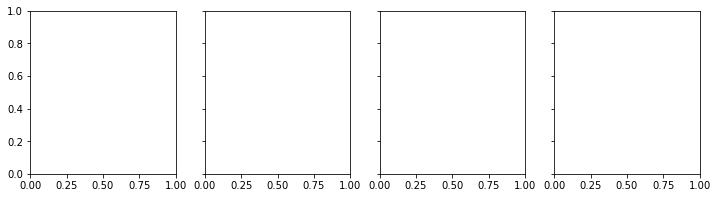

In [58]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,0],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()